
Aquest primer bloc de codi serveix per poder importar documents des del Drive:


In [ ]:
!pip install --upgrade gspread

from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open("YITGResearch#001-InfluenciaReferentsEstudiantsSTEM").sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows)

Requirement already up-to-date: gspread in /usr/local/lib/python3.7/dist-packages (3.7.0)
[['Marca temporal', 'Escull el teu idioma / Escoge tu idioma / Choose your language', 'Gènere', 'Nacionalitat', 'Has finalitzat, o estas actualment cursant, estudis superiors STEM?', 'El teu referent 1 (Pares, mares,tutors,...)ha finalitzat estudis superiors?', 'En cas afirmatiu, estan aquests enfocats en l’àmbit STEM?', 'El teu referent 2 (Pares, mares,tutors,...) ha finalitzat estudis superiors?', 'En cas afirmatiu, estan aquests enfocats en l’àmbit STEM?', 'Consideres que els estudis d’algun del teus referents o d’amdós t’han condicionat a l’hora d’escollir els teus estudis superiors?', 'Género', 'Nacionalidad', '¿Has finalizado, o estás actualmente cursando, estudios superiores STEM?', '¿Tu referente 1 (Padres, madres,tutores...) ha finalizado estudios superiores?', 'En caso afirmativo, ¿pertenecen al ámbito STEM?', '¿Tu referente 2 (padres,madres,tutores...) ha finalizado estudios superiores?

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,Marca temporal,Escull el teu idioma / Escoge tu idioma / Choo...,Gènere,Nacionalitat,"Has finalitzat, o estas actualment cursant, es...","El teu referent 1 (Pares, mares,tutors,...)ha ...","En cas afirmatiu, estan aquests enfocats en l’...","El teu referent 2 (Pares, mares,tutors,...) ha...","En cas afirmatiu, estan aquests enfocats en l’...",Consideres que els estudis d’algun del teus re...,Género,Nacionalidad,"¿Has finalizado, o estás actualmente cursando,...","¿Tu referente 1 (Padres, madres,tutores...) ha...","En caso afirmativo, ¿pertenecen al ámbito STEM?","¿Tu referente 2 (padres,madres,tutores...) ha ...","En caso afirmativo, ¿pertenecen al ámbito STEM?",¿Consideras que los estudios de alguno de tus ...,Gender,Nationality,"Have you completed, or are you currently pursu...",Has your first mentor (Fathers/mothers/tutors)...,"If so, are the studies STEM-focused?",Has your second mentor (Fathers/mothers/tutors...,"If so, are the studies STEM-focused?",Do you consider that your mentors’ studies hav...
1,29/11/2020 18:37:58,Esp,Mujer,Española,Sí,Sí,Sí,No,,No,,,,,,,,,,,,,,,,
2,29/11/2020 18:41:42,Esp,Mujer,Española,Sí,No,,,,No,,,,,,,,,,,,,,,,
3,29/11/2020 19:15:28,Eng,Female,Spanish,Yes,Yes,Yes,Yes,No,Yes,,,,,,,,,,,,,,,,
4,29/11/2020 19:25:20,Esp,Mujer,Española,Sí,No,,No,,No,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,12/03/2021 21:11:08,Cat,Home,Espanyola,Sí,No,,No,,No,,,,,,,,,,,,,,,,
589,13/03/2021 7:25:05,Cat,Dona,Espanyola,Sí,No,,No,,No,,,,,,,,,,,,,,,,
590,13/03/2021 9:55:48,Cat,Home,Espanyola,Sí,Sí,Sí,Sí,Sí,No,,,,,,,,,,,,,,,,
591,15/03/2021 18:16:36,Esp,,,,,,,,,Hombre,Española,Sí,Sí,Sí,Sí,No,Sí,,,,,,,,


In [ ]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

df1 = df.iloc[:, 2:9]
df1

,Gènere,Nacionalitat,"Has finalitzat, o estas actualment cursant, estudis superiors STEM?","El teu referent 1 (Pares, mares,tutors,...)ha finalitzat estudis superiors?","En cas afirmatiu, estan aquests enfocats en l’àmbit STEM?","El teu referent 2 (Pares, mares,tutors,...) ha finalitzat estudis superiors?","En cas afirmatiu, estan aquests enfocats en l’àmbit STEM?"
1,Mujer,Española,Sí,Sí,Sí,No,
2,Mujer,Española,Sí,No,,,
3,Female,Spanish,Yes,Yes,Yes,Yes,No
4,Mujer,Española,Sí,No,,No,
5,Dona,Espanyola,No,Sí,No,Sí,No
...,...,...,...,...,...,...,...
588,Home,Espanyola,Sí,No,,No,
589,Dona,Espanyola,Sí,No,,No,
590,Home,Espanyola,Sí,Sí,Sí,Sí,Sí
591,,,,,,,


In [ ]:
df1.columns = ["genere", "nacionalitat", "stem", "referent1estudis", "referent1stem", "referent2estudis", "referent2stem"] #noms mes llegibles
df1 

,genere,nacionalitat,stem,referent1estudis,referent1stem,referent2estudis,referent2stem
1,Mujer,Española,Sí,Sí,Sí,No,
2,Mujer,Española,Sí,No,,,
3,Female,Spanish,Yes,Yes,Yes,Yes,No
4,Mujer,Española,Sí,No,,No,
5,Dona,Espanyola,No,Sí,No,Sí,No
...,...,...,...,...,...,...,...
588,Home,Espanyola,Sí,No,,No,
589,Dona,Espanyola,Sí,No,,No,
590,Home,Espanyola,Sí,Sí,Sí,Sí,Sí
591,,,,,,,


In [ ]:
df1.genere.unique() #busquem categories uniques dins de la columna genere

array(['Mujer', 'Female', 'Dona', 'Home', 'No-Binari', 'No-binario',
       'Hombre', 'Male', ''], dtype=object)

In [ ]:
df1 = df1.replace(to_replace =["Dona", "Mujer", "Female"],  value ="dona") 
df1 = df1.replace(to_replace =["Home", "Hombre", "Male"],  value ="home") 
df1 = df1.replace(to_replace =["No-Binari", "No-binario"],  value ="no-binari") #sabem que es una guarrada pero es lo unic que ha funcionat :)

df1 = df1.replace(to_replace = ["Sí", "Yes"], value=1)
df1 = df1.replace(to_replace = ["No"], value=0)

df1 = df1.drop(columns=['nacionalitat'])

In [ ]:
import numpy as np

df1 = df1.replace(r'\s+',-1,regex=True).replace('',-1) #assignem -1 als que havien deixat la resposta buida (es a dir, no segon referent o si referent amb estudis no és stem)

df1

,genere,stem,referent1estudis,referent1stem,referent2estudis,referent2stem
1,dona,1,1,1,0,-1
2,dona,1,0,-1,-1,-1
3,dona,1,1,1,1,0
4,dona,1,0,-1,0,-1
5,dona,0,1,0,1,0
...,...,...,...,...,...,...
588,home,1,0,-1,0,-1
589,dona,1,0,-1,0,-1
590,home,1,1,1,1,1
591,-1,-1,-1,-1,-1,-1


In [ ]:
df1['genere'].value_counts() # exemple per veure quantes observacions de cada categoria hi ha per la variable genere

dona         427
home         111
-1            48
no-binari      6
Name: genere, dtype: int64

In [ ]:
df1.groupby(["genere", "referent1estudis", "referent1stem", "referent2estudis", "referent2stem"]).size() # un altre exemple per analitzar interseccions de categories

genere     referent1estudis  referent1stem  referent2estudis  referent2stem
-1         -1                -1             -1                -1                48
dona        0                -1             -1                -1                 3
                                             0                -1               100
                                                               0                 1
                                             1                 0                10
                                                               1                 1
                              0              0                -1                 3
                                                               0                46
                                             1                 0                 3
                                                               1                 5
                              1              1                 1                 1
           

Upsample d'homes

In [ ]:
df1['genere'].value_counts() #Values before the upsample

dona         427
home         111
-1            48
no-binari      6
Name: genere, dtype: int64

In [ ]:
from sklearn.utils import resample
#separate the two classes
df_majority = df1[df1.genere=='dona']
df_minority = df1[df1.genere=='home']
df_binari = df1[df1.genere=='no-binari']
#upsamble the minority class
df_minority_upsampled = resample(df_minority,replace=True,
                                 n_samples=300,
                                 random_state=42)
#combine majority with upsampled
df_upsampled = pd.concat([df_majority,df_minority_upsampled,df_binari])
#display new results
df_upsampled['genere'].value_counts()
df1 = df_upsampled
df1


,genere,stem,referent1estudis,referent1stem,referent2estudis,referent2stem
1,dona,1,1,1,0,-1
2,dona,1,0,-1,-1,-1
3,dona,1,1,1,1,0
4,dona,1,0,-1,0,-1
5,dona,0,1,0,1,0
...,...,...,...,...,...,...
73,no-binari,1,0,0,0,0
93,no-binari,1,1,1,1,1
226,no-binari,1,1,1,1,1
355,no-binari,1,1,1,1,1


In [ ]:
df1['genere'].value_counts()

dona         427
home         300
no-binari      6
Name: genere, dtype: int64

A partir de aquí comencem l'anàlisi de dades

In [ ]:
a=df1['genere'].value_counts()

In [ ]:
dona=df1[df1.genere=="dona"]
home=df1[df1.genere=="home"]
nobinari=df1[df1.genere=="no-binari"]

In [ ]:
dona['stem'].value_counts()

1    347
0     80
Name: stem, dtype: int64

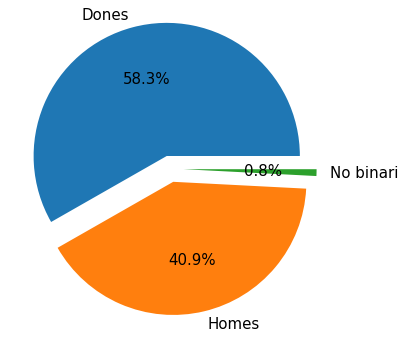

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [6,6]
matplotlib.rcParams.update({'font.size': 15})

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Dones', 'Homes', 'No binari'
sizes = [len(dona), len(home), len(nobinari)]
explode = (0.1, 0.1, 0.1)  #  "explode" all


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,  labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

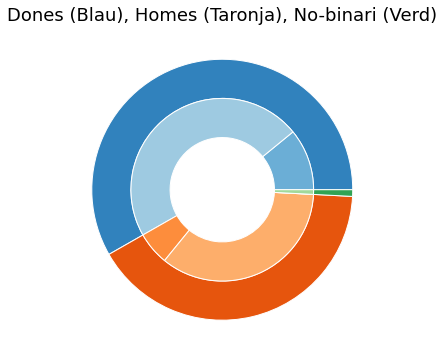

In [ ]:
plt.rcParams['figure.figsize'] = [6,6]
matplotlib.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(6, 6))

size = 0.3
vals = np.array([[len(dona[dona.stem==0]), len(dona[dona.stem==1])], [len(home[home.stem==0]), len(home[home.stem==1])], [len(nobinari[nobinari.stem==0]), len(nobinari[nobinari.stem==1])]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])


ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,  
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Dones (Blau), Homes (Taronja), No-binari (Verd)')
plt.show()

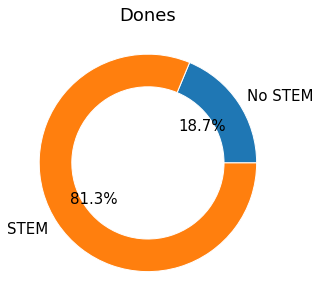

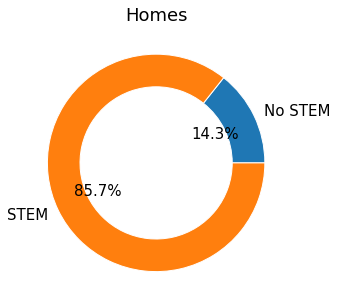

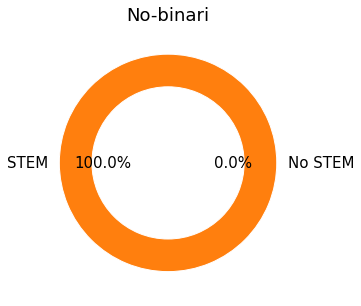

In [ ]:
# Pie charts indicant la proporcio de persones enquestades per genere classificat en stem / no stem

plt.rcParams['figure.figsize'] = [5,5]
matplotlib.rcParams.update({'font.size': 15})

labels= 'No STEM', 'STEM'

fig1, ax1 = plt.subplots()

ax1.pie([len(dona[dona.stem==0]), len(dona[dona.stem==1])], radius=1, labels=labels,autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

plt.title("Dones")

fig1, ax1 = plt.subplots()
ax1.pie([len(home[home.stem==0]), len(home[home.stem==1])], radius=1, labels=labels,autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

plt.title("Homes")
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie([len(nobinari[nobinari.stem==0]), len(nobinari[nobinari.stem==1])], radius=1, labels=labels,autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

plt.title("No-binari")
plt.show()

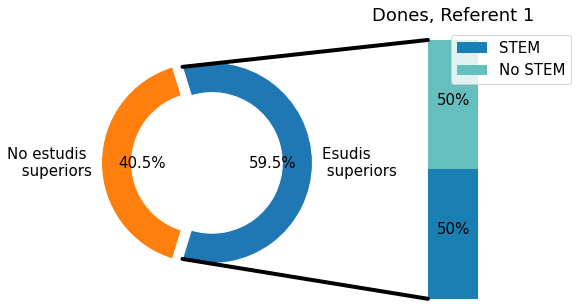

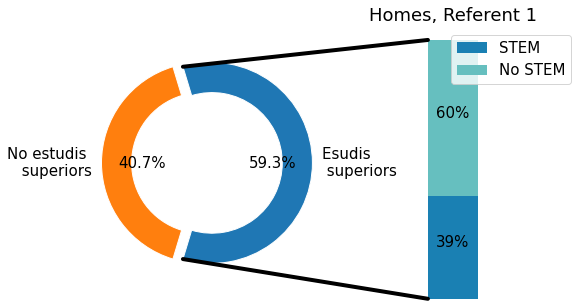

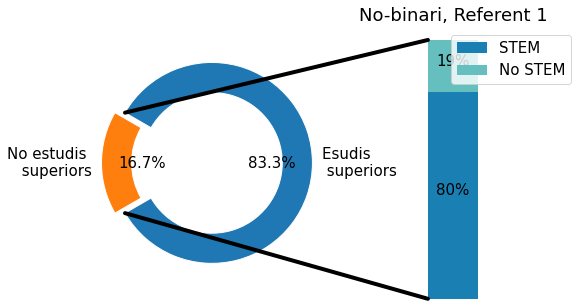

In [ ]:
plt.rcParams['figure.figsize'] = [5,5]
matplotlib.rcParams.update({'font.size': 15})
from matplotlib.patches import ConnectionPatch

#Analisis del estudis superiors dels referents per genere del enquestats i referent 1 i 2.

def piepluschart(titol, dades): # per referent 1

  # make figure and assign axis objects
  fig = plt.figure(figsize=(9, 5))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)
  fig.subplots_adjust(wspace=0)

  # pie chart parameters
  totreferents=len(dades[dades.referent1estudis==1])+ len(dades[dades.referent1estudis==0])
  ratios = [len(dades[dades.referent1estudis==1])/totreferents, len(dades[dades.referent1estudis==0])/totreferents]
  labels= 'Esudis \n superiors', 'No estudis \n superiors'
  explode = [0.1, 0]
  # rotate so that first wedge is split by the x-axis
  angle = -180 * ratios[0]
  ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode,wedgeprops=dict(width=size, edgecolor='w'))

  # bar chart parameters

  xpos = 0
  bottom = 0
  dades2=dades[dades.referent1estudis==1]
  totestudis = len(dades2[dades2.referent1stem==1])+ len(dades2[dades2.referent1stem==0])
  ratios = [len(dades2[dades2.referent1stem==1])/totestudis, len(dades2[dades2.referent1stem==0])/totestudis]
  width = .2
  colors = [[.1, .5, .7], [.4, .75, .75]]

  for j in range(len(ratios)):
      height = ratios[j]
      ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
      ypos = bottom + ax2.patches[j].get_height() / 2
      bottom += height
      ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
              ha='center')

  ax2.set_title('Age of approvers')
  ax2.legend(('STEM', 'No STEM'))
  ax2.axis('off')
  ax2.set_xlim(- 2.5 * width, 2.5 * width)

  # use ConnectionPatch to draw lines between the two plots
  # get the wedge data
  theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
  center, r = ax1.patches[0].center, ax1.patches[0].r
  bar_height = sum([item.get_height() for item in ax2.patches])

  # draw top connecting line
  x = r * np.cos(np.pi / 180 * theta2) + center[0]
  y = r * np.sin(np.pi / 180 * theta2) + center[1]
  con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                        xyB=(x, y), coordsB=ax1.transData)
  con.set_color([0, 0, 0])
  con.set_linewidth(4)
  ax2.add_artist(con)

  # draw bottom connecting line
  x = r * np.cos(np.pi / 180 * theta1) + center[0]
  y = r * np.sin(np.pi / 180 * theta1) + center[1]
  con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                        xyB=(x, y), coordsB=ax1.transData)
  con.set_color([0, 0, 0])
  ax2.add_artist(con)
  con.set_linewidth(4)

  
  plt.title(titol)


piepluschart("Dones, Referent 1", dona)
piepluschart("Homes, Referent 1", home)
piepluschart("No-binari, Referent 1", nobinari)

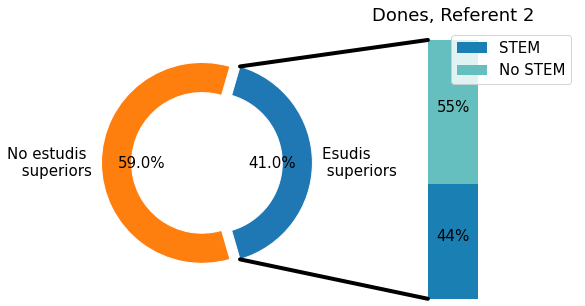

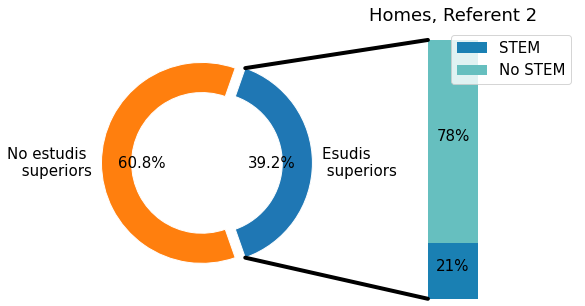

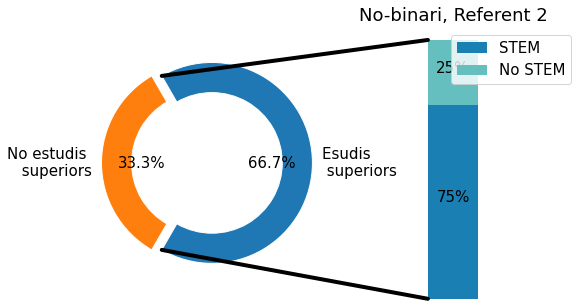

In [ ]:
def piepluschart2(titol, dades): #per referent 2

  

  # make figure and assign axis objects
  fig = plt.figure(figsize=(9, 5))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)
  fig.subplots_adjust(wspace=0)

  # pie chart parameters
  totreferents=len(dades[dades.referent2estudis==1])+ len(dades[dades.referent2estudis==0])
  ratios = [len(dades[dades.referent2estudis==1])/totreferents, len(dades[dades.referent2estudis==0])/totreferents]
  labels= 'Esudis \n superiors', 'No estudis \n superiors'
  explode = [0.1, 0]
  # rotate so that first wedge is split by the x-axis
  angle = -180 * ratios[0]
  ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode,wedgeprops=dict(width=size, edgecolor='w'))

  # bar chart parameters

  xpos = 0
  bottom = 0
  dades2=dades[dades.referent2estudis==1]
  totestudis = len(dades2[dades2.referent2stem==1])+ len(dades2[dades2.referent2stem==0])
  ratios = [len(dades2[dades2.referent2stem==1])/totestudis, len(dades2[dades2.referent2stem==0])/totestudis]
  width = .2
  colors = [[.1, .5, .7], [.4, .75, .75]]

  for j in range(len(ratios)):
      height = ratios[j]
      ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
      ypos = bottom + ax2.patches[j].get_height() / 2
      bottom += height
      ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
              ha='center')

  ax2.set_title('Age of approvers')
  ax2.legend(('STEM', 'No STEM'))
  ax2.axis('off')
  ax2.set_xlim(- 2.5 * width, 2.5 * width)

  # use ConnectionPatch to draw lines between the two plots
  # get the wedge data
  theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
  center, r = ax1.patches[0].center, ax1.patches[0].r
  bar_height = sum([item.get_height() for item in ax2.patches])

  # draw top connecting line
  x = r * np.cos(np.pi / 180 * theta2) + center[0]
  y = r * np.sin(np.pi / 180 * theta2) + center[1]
  con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                        xyB=(x, y), coordsB=ax1.transData)
  con.set_color([0, 0, 0])
  con.set_linewidth(4)
  ax2.add_artist(con)

  # draw bottom connecting line
  x = r * np.cos(np.pi / 180 * theta1) + center[0]
  y = r * np.sin(np.pi / 180 * theta1) + center[1]
  con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                        xyB=(x, y), coordsB=ax1.transData)
  con.set_color([0, 0, 0])
  ax2.add_artist(con)
  con.set_linewidth(4)

  
  plt.title(titol)


piepluschart2("Dones, Referent 2", dona)
piepluschart2("Homes, Referent 2", home)
piepluschart2("No-binari, Referent 2", nobinari)

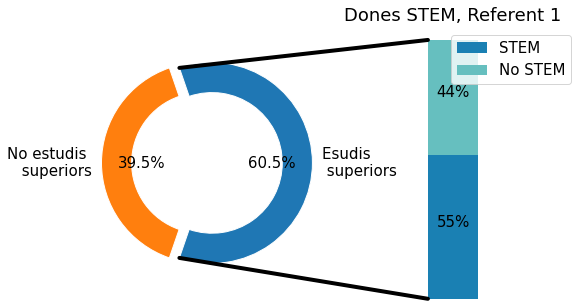

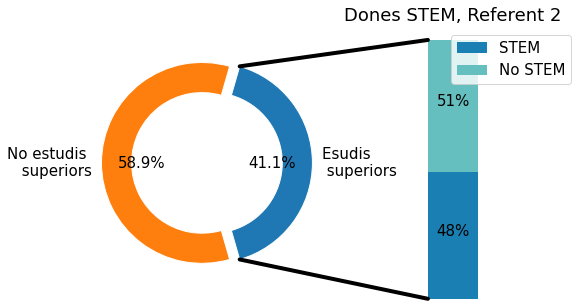

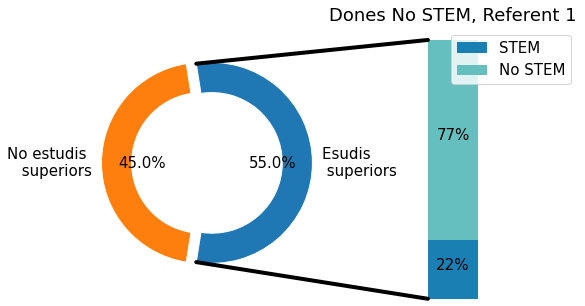

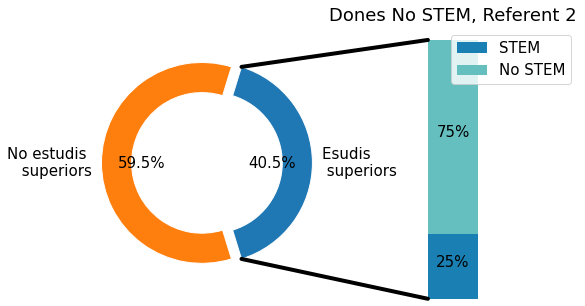

In [ ]:
# Comparem Dones STEM amb Dones no STEM en base als estudis dels referents


piepluschart("Dones STEM, Referent 1", dona[dona.stem==1])
piepluschart2("Dones STEM, Referent 2", dona[dona.stem==1])


piepluschart("Dones No STEM, Referent 1", dona[dona.stem==0])
piepluschart2("Dones No STEM, Referent 2", dona[dona.stem==0])


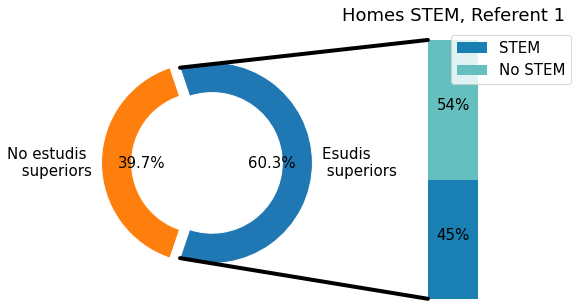

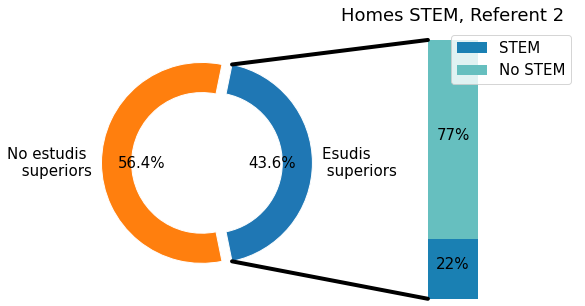

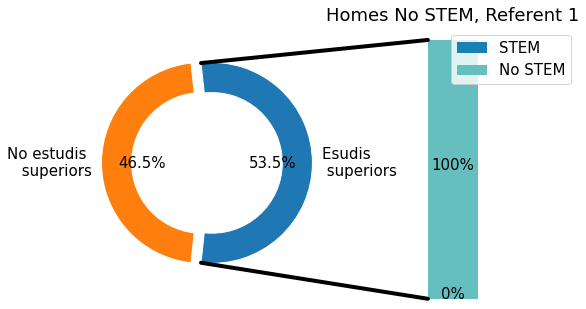

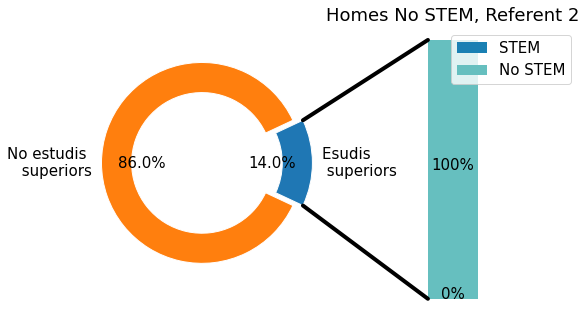

In [ ]:
# Comparem Homes STEM amb Homes no STEM en base als estudis dels referents (Nota: no ho faig amb no-binari perque la sample size es 6 i tots/totes eren STEM) 

piepluschart("Homes STEM, Referent 1", home[home.stem==1])
piepluschart2("Homes STEM, Referent 2", home[home.stem==1])


piepluschart("Homes No STEM, Referent 1", home[home.stem==0])
piepluschart2("Homes No STEM, Referent 2", home[home.stem==0])


Ara fare grafics similars, pero sense pies, sino amb barres... Perque en el fons les dades que tenim son poques i una mica biased... i les pie-charts poden ser misleading. Un altre cop, aqui nomes considero homes i dones, perque sino l'escala seria dificil de veure.

In [ ]:

def get_counts(data):
  data2=data[data.referent1estudis==1]
  data3=data[data.referent2estudis==1]
  count1= [len(data2[data2.referent1stem==1]), len(data2[data2.referent1stem==0]), len(data[data.referent1estudis==0])]
  count2= [len(data3[data3.referent2stem==1]), len(data3[data3.referent2stem==0]), len(data[data.referent2estudis==0])]
  return [count1, count2]

[men_count1 , men_count2] = get_counts(home)
[women_count1 , women_count2] = get_counts(dona)

#men_count = [len(home[home.referent1stem==1]), len(home[home.referent1stem==0]), len(home[home.referent1estudis==0]), len(home[home.referent2stem==1]), len(home[home.referent2stem==0]), len(home[home.referent2estudis==0])]
#women_count = [len(dona[dona.referent1stem==1]), len(dona[dona.referent1stem==0]), len(dona[dona.referent1estudis==0]), len(dona[dona.referent2stem==1]), len(dona[dona.referent2stem==0]), len(dona[dona.referent2estudis==0])]

men_rel1= np.true_divide(men_count1, sum(men_count1)) 
men_rel2= np.true_divide(men_count2, sum(men_count2)) 
women_rel1= np.true_divide(women_count1, sum(women_count1)) 
women_rel2= np.true_divide(women_count2, sum(women_count2)) 


In [ ]:


        
def plot_bars(labels, men, women,eixy):
  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars

  plt.rcParams['figure.figsize'] = [10,6]

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, men , width, label='Homes')
  rects2 = ax.bar(x + width/2, women , width, label='Dones')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel(eixy)
  #ax.set_title('Scores by group and gender')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()

  def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)

  fig.tight_layout()

  plt.show()

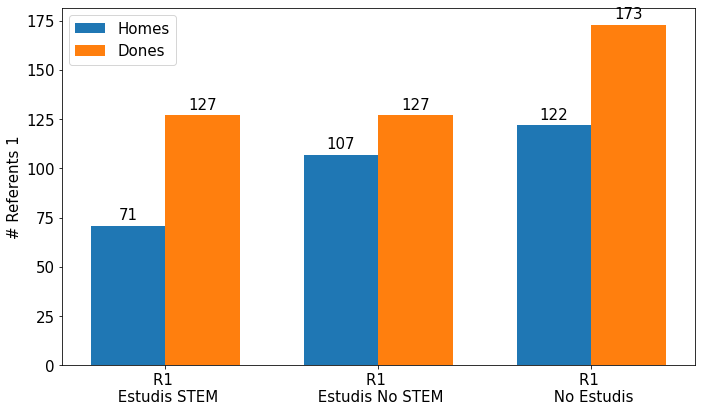

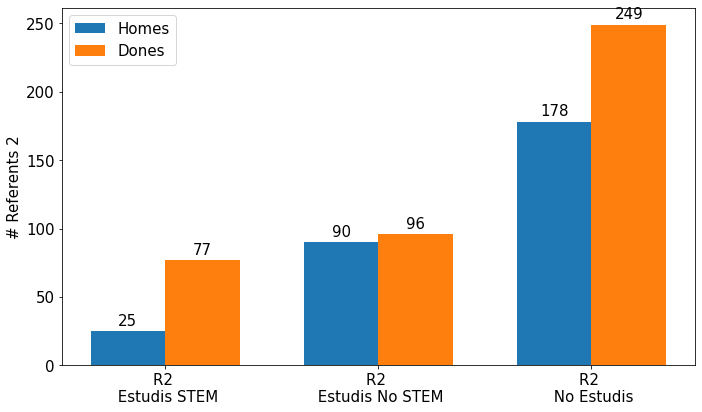

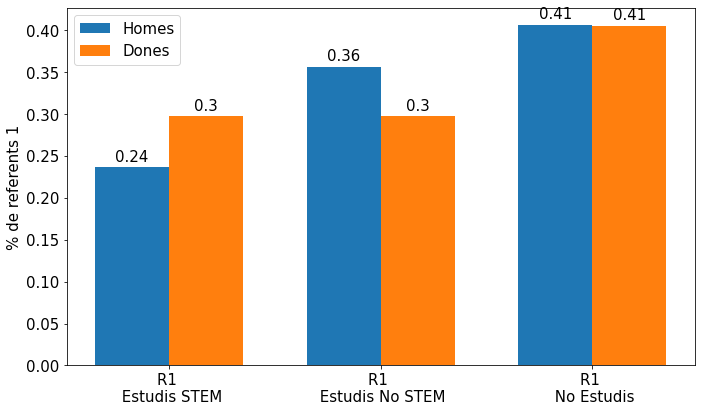

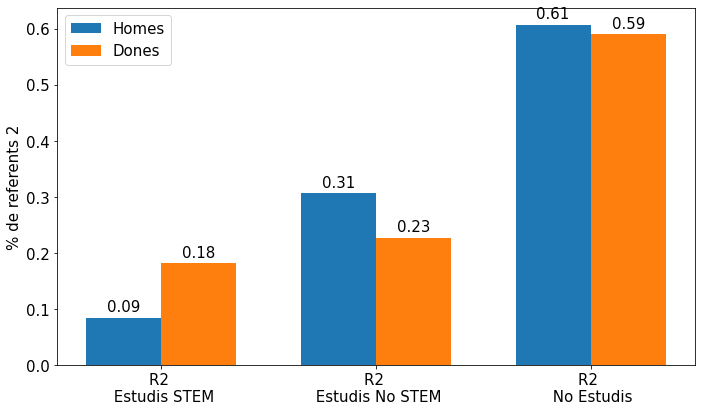

In [ ]:
labels1 = ['R1 \n Estudis STEM', 'R1 \n Estudis No STEM', 'R1 \n No Estudis']
labels2 = ['R2 \n Estudis STEM', 'R2 \n Estudis No STEM', 'R2 \n No Estudis']


plot_bars(labels1, men_count1, women_count1, '# Referents 1')
plot_bars(labels2, men_count2, women_count2, '# Referents 2')

plot_bars(labels1, men_rel1, women_rel1, '% de referents 1')
plot_bars(labels2, men_rel2, women_rel2, '% de referents 2')



Repetim les figures de adalt separant per dones stem i no stem & homes stem i no stem

In [ ]:

def get_counts(data):
  data2=data[data.referent1estudis==1]
  data3=data[data.referent2estudis==1]
  count1= [len(data2[data2.referent1stem==1]), len(data2[data2.referent1stem==0]), len(data[data.referent1estudis==0])]
  count2= [len(data3[data3.referent2stem==1]), len(data3[data3.referent2stem==0]), len(data[data.referent2estudis==0])]
  return [count1, count2]

[men_S_count1 , men_S_count2] = get_counts(home[home.stem==1])
[men_nS_count1 , men_nS_count2] = get_counts(home[home.stem==0])
[women_S_count1 , women_S_count2] = get_counts(dona[dona.stem==1])
[women_nS_count1 , women_nS_count2] = get_counts(dona[dona.stem==0])

#men_count = [len(home[home.referent1stem==1]), len(home[home.referent1stem==0]), len(home[home.referent1estudis==0]), len(home[home.referent2stem==1]), len(home[home.referent2stem==0]), len(home[home.referent2estudis==0])]
#women_count = [len(dona[dona.referent1stem==1]), len(dona[dona.referent1stem==0]), len(dona[dona.referent1estudis==0]), len(dona[dona.referent2stem==1]), len(dona[dona.referent2stem==0]), len(dona[dona.referent2estudis==0])]

men_S_rel1= np.true_divide(men_S_count1, sum(men_S_count1)) 
men_S_rel2= np.true_divide(men_S_count2, sum(men_S_count2)) 
women_S_rel1= np.true_divide(women_S_count1, sum(women_S_count1)) 
women_S_rel2= np.true_divide(women_S_count2, sum(women_S_count2)) 

men_nS_rel1= np.true_divide(men_nS_count1, sum(men_nS_count1)) 
men_nS_rel2= np.true_divide(men_nS_count2, sum(men_nS_count2)) 
women_nS_rel1= np.true_divide(women_nS_count1, sum(women_nS_count1)) 
women_nS_rel2= np.true_divide(women_nS_count2, sum(women_nS_count2)) 

In [ ]:
def plot_bars_4comp(labels, menS, mennS, womenS, womennS, eixy):
  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars

  # Set position of bar on X axis
  #1 = np.arange(len(bars1))
  #r2 = [x + barWidth for x in r1]
  #r3 = [x + barWidth for x in r2]


  plt.rcParams['figure.figsize'] = [6,6]

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, menS , width/4, label='Homes STEM')
  rects2 = ax.bar(x - width/4, womenS , width/4, label='Dones STEM')

  rects3 = ax.bar(x + width/4, mennS , width/4, label='Homes no STEM')
  rects4 = ax.bar(x + width/2, womennS , width/4, label='Dones no STEM')
  
  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel(eixy)
  #ax.set_title('Scores by group and gender')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()
  


  def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)
  autolabel(rects3)
  autolabel(rects4)

  fig.tight_layout()

  plt.show()

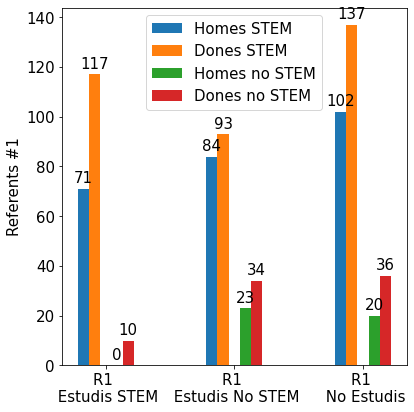

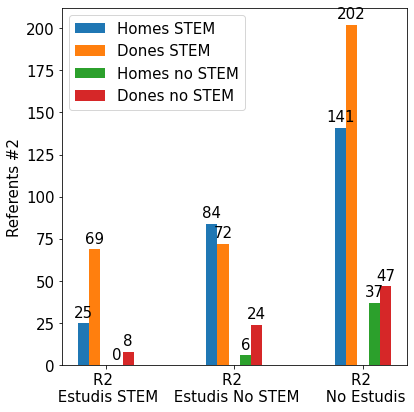

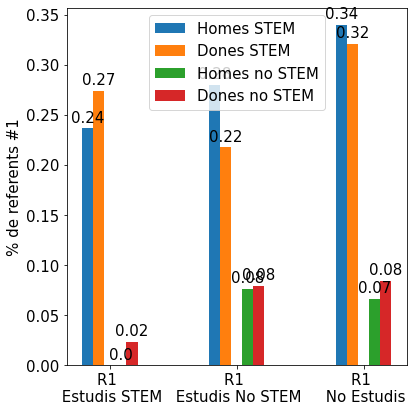

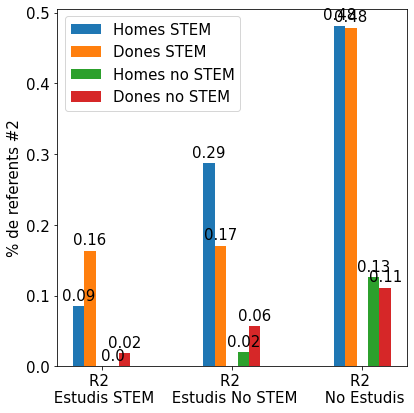

In [ ]:
# plot_bars_4comp(labels, menS, mennS, womenS, womennS, eixy):

plot_bars_4comp(labels1, men_S_count1,  men_nS_count1, women_S_count1, women_nS_count1, 'Referents #1')
plot_bars_4comp(labels2, men_S_count2,  men_nS_count2, women_S_count2, women_nS_count2, 'Referents #2')


# Els percentatges sumen 100% per cada categoria (homes stem, homes no stem, dones stem dones no stem)
plot_bars_4comp(labels1, men_S_rel1,  men_nS_rel1, women_S_rel1, women_nS_rel1, '% de referents #1')
plot_bars_4comp(labels2, men_S_rel2,  men_nS_rel2, women_S_rel2, women_nS_rel2, '% de referents #2')

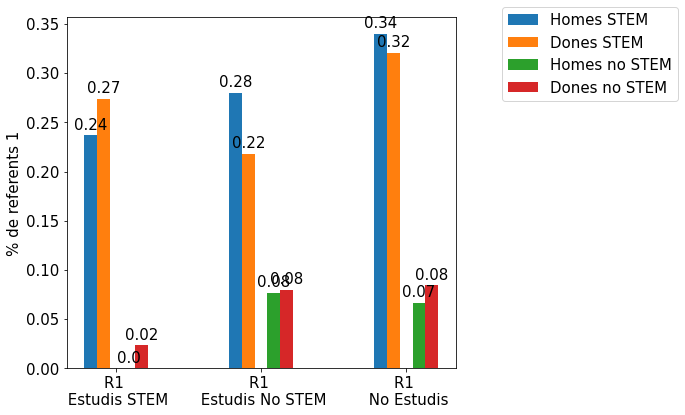

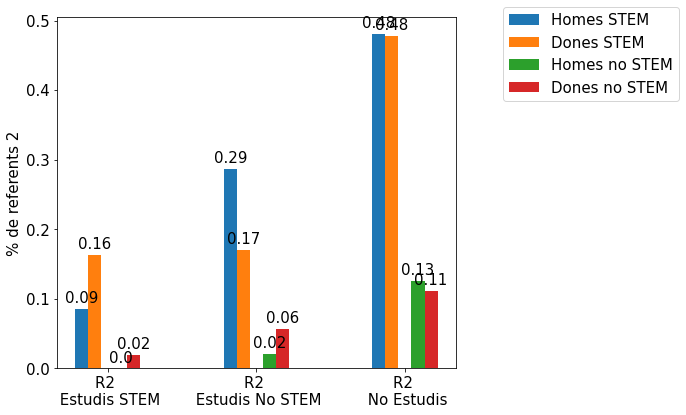

In [ ]:

men_S_rel1= np.true_divide(men_S_count1, sum(men_S_count1+men_nS_count1)) 
men_S_rel2= np.true_divide(men_S_count2, sum(men_S_count2+men_nS_count2)) 
women_S_rel1= np.true_divide(women_S_count1, sum(women_S_count1+women_nS_count1)) 
women_S_rel2= np.true_divide(women_S_count2, sum(women_S_count2+women_nS_count2)) 

men_nS_rel1= np.true_divide(men_nS_count1, sum(men_S_count1+men_nS_count1)) 
men_nS_rel2= np.true_divide(men_nS_count2, sum(men_S_count2+men_nS_count2)) 
women_nS_rel1= np.true_divide(women_nS_count1, sum(women_S_count1+women_nS_count1)) 
women_nS_rel2= np.true_divide(women_nS_count2, sum(women_S_count2+women_nS_count2)) 



# Els percentatges sumen 100% per cada genere (homes vs dones )
plot_bars_4comp(labels1, men_S_rel1,  men_nS_rel1, women_S_rel1, women_nS_rel1, '% de referents 1')
plot_bars_4comp(labels2, men_S_rel2,  men_nS_rel2, women_S_rel2, women_nS_rel2, '% de referents 2')

In [ ]:
#Check si les persones que han posat referentXestudis=0 mostren valor referentXstem != -1
df2 = df1[df1.referent1estudis==0]
df2[df2.referent1stem == 1]

,genere,stem,referent1estudis,referent1stem,referent2estudis,referent2stem
477,dona,1,0,1,1,1
376,home,1,0,1,0,0
40,home,1,0,1,0,0
376,home,1,0,1,0,0
376,home,1,0,1,0,0
376,home,1,0,1,0,0
40,home,1,0,1,0,0
40,home,1,0,1,0,0
40,home,1,0,1,0,0


In [ ]:
df3 = df1[df1.referent2estudis==0]
df3[df3.referent2stem == 1]

,genere,stem,referent1estudis,referent1stem,referent2estudis,referent2stem
269,dona,1,1,0,0,1
504,home,1,1,1,0,1


Decidim descartar aquests 3 casos per no saber si són equivocacions - tots els gràfics parteixen de la condició que referentXestudis==1 quan analitzem quants d'aquests són de l'àmbit STEM.

In [ ]:
import seaborn as sns

df_dones = df1[df1.genere=='dona']
df_homes = df1[df1.genere=='home']

print(df_dones.corr())
print(df_homes.corr())

                      stem  referent1estudis  ...  referent2estudis  referent2stem
stem              1.000000          0.043864  ...          0.005574       0.024258
referent1estudis  0.043864          1.000000  ...          0.475865       0.405967
referent1stem     0.106982          0.754823  ...          0.448426       0.560759
referent2estudis  0.005574          0.475865  ...          1.000000       0.731888
referent2stem     0.024258          0.405967  ...          0.731888       1.000000

[5 rows x 5 columns]
                      stem  referent1estudis  ...  referent2estudis  referent2stem
stem              1.000000          0.048672  ...          0.171323       0.080701
referent1estudis  0.048672          1.000000  ...          0.514646       0.371182
referent1stem     0.190448          0.636271  ...          0.341636       0.529505
referent2estudis  0.171323          0.514646  ...          1.000000       0.656164
referent2stem     0.080701          0.371182  ...          0.6561

In [ ]:
import copy
import random

df_plot = copy.deepcopy(df1)
def val_y(genere):
    if genere == 'dona':
        return random.uniform(25,100)
    if genere == 'home':
        return random.uniform(-25,-100)
    else:
        return random.uniform(10,-10)

def val_x(stem):
    if stem:
        return random.uniform(10,100)
    else:
        return random.uniform(-10,-100)

def val_ref_stem(ref1stem, ref2stem):
    if ref1stem and ref2stem:
        return '2 ref STEM'
    elif ref1stem or ref2stem:
        return '1 ref STEM'
    else:
        return '0 ref STEM'

def val_ref_estudis(ref1estudis, ref2estudis):
    if ref1estudis and ref2estudis:
        return '2 ref estudis'
    elif ref1estudis or ref2estudis:
        return '1 ref estudis'
    else:
        return '0 ref estudis'


# tune dataframe to add column values for cross plots
df_plot['genere'] = df_plot['genere'].apply(val_y)
df_plot['stem'] = df_plot['stem'].apply(val_x)
df_plot['plot_val_ref_stem'] = df_plot.apply(lambda x: val_ref_stem(x['referent1stem'],x['referent2stem']),axis=1)
df_plot['plot_val_ref_estudis'] = df_plot.apply(lambda x: val_ref_estudis(x['referent1estudis'],x['referent2estudis']),axis=1)


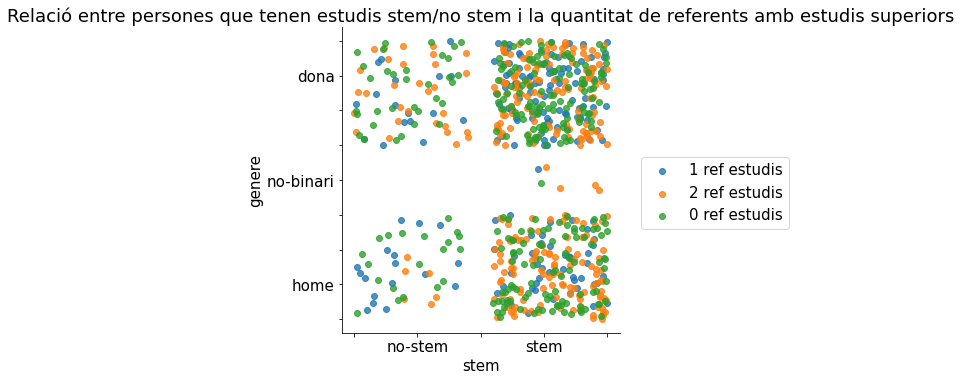

In [ ]:
g = sns.lmplot(x='stem', y='genere', data=df_plot, hue='plot_val_ref_estudis', fit_reg=False, legend=False)
plt.legend(bbox_to_anchor = (1.05, 0.6))#loc='lower left')
plt.title("Relació entre persones que tenen estudis stem/no stem i la quantitat de referents amb estudis superiors")
for ax in g.axes.flat:
    ax.set_yticklabels(['','','home','','','no-binari','','','dona']) # set new labels
    ax.set_xticklabels(['','','no-stem','','stem']) # set new labels

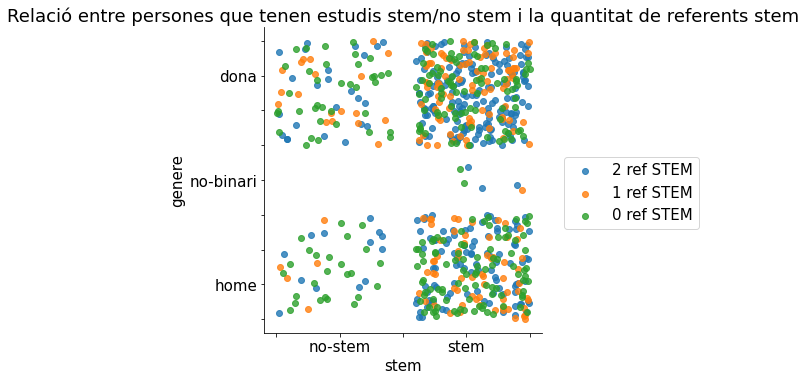

In [ ]:
g = sns.lmplot(x='stem', y='genere', data=df_plot, hue='plot_val_ref_stem', fit_reg=False, legend=False)
plt.legend(bbox_to_anchor = (1.05, 0.6))#loc='lower left')
plt.title("Relació entre persones que tenen estudis stem/no stem i la quantitat de referents stem")
for ax in g.axes.flat:
    ax.set_yticklabels(['','','home','','','no-binari','','','dona']) # set new labels
    ax.set_xticklabels(['','','no-stem','','stem']) # set new labels

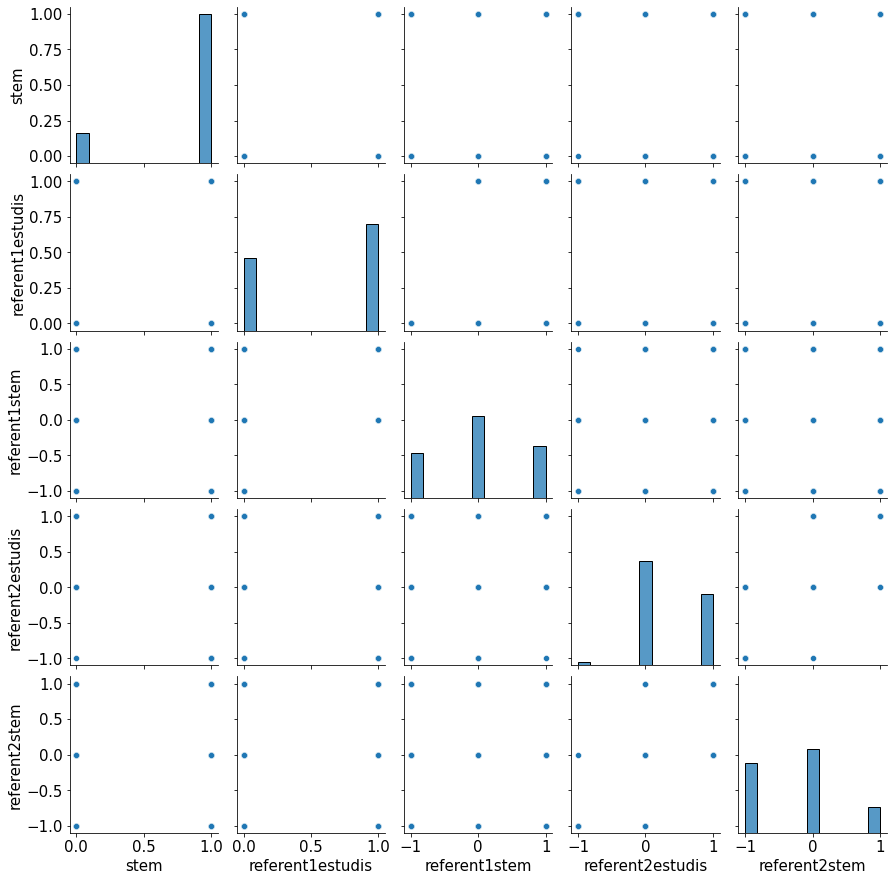

In [ ]:
sns.pairplot(df1, kind="scatter")

In [ ]:
#Eliminar els enquestats que han posat referentXestudis=0 mostren valor referentXstem = 1 (inconsistent!)

df1_clean = df1.drop([40, 376, 269])

Aquí intento crear dos noves columnes numeriques, que representin el # de referents de cada enquestat i el # de referents del enquestat que son STEM.

In [ ]:
df1_extended=copy.deepcopy(df1_clean)

In [ ]:
df1_extended

,genere,stem,referent1estudis,referent1stem,referent2estudis,referent2stem
1,dona,1,1,1,0,-1
2,dona,1,0,-1,-1,-1
3,dona,1,1,1,1,0
4,dona,1,0,-1,0,-1
5,dona,0,1,0,1,0
...,...,...,...,...,...,...
73,no-binari,1,0,0,0,0
93,no-binari,1,1,1,1,1
226,no-binari,1,1,1,1,1
355,no-binari,1,1,1,1,1


In [ ]:
def label_count_estudis(row):
   if row['referent1estudis'] == 1 and row['referent2estudis'] == 1  :
      return 2
   elif row['referent1estudis'] == 1 or row['referent2estudis'] == 1  :
      return 1
   else :
      return 0

def label_count_stem(row):
   if row['referent1estudis'] == 1 and row['referent2estudis'] == 1  :
      if row['referent1stem'] == 1 and row['referent2stem'] == 1  :
        return 2
      if row['referent1stem'] == 1 or row['referent2stem'] == 1  :
        return 1
      else:
        return 0

   elif row['referent1estudis'] == 1  :
      return row['referent1stem']
   elif row['referent2estudis'] == 1  :
      return row['referent2stem']
   else :
      return 0

df1_extended['count_estudis'] = df1_extended.apply (lambda row: label_count_estudis(row), axis=1)
df1_extended['count_stem'] = df1_extended.apply (lambda row: label_count_stem(row), axis=1)


In [ ]:
df1_extended[200:250] # evaluacio per comprovar que les variables s'han creat be

,genere,stem,referent1estudis,referent1stem,referent2estudis,referent2stem,count_estudis,count_stem
213,dona,1,1,1,0,-1,1,1
214,dona,1,0,-1,0,-1,0,0
215,dona,1,0,0,0,0,0,0
216,dona,1,0,0,0,0,0,0
217,dona,1,0,-1,1,0,1,0
218,dona,1,0,0,0,-1,0,0
219,dona,1,0,0,0,0,0,0
221,dona,1,1,1,1,1,2,2
222,dona,1,0,-1,0,-1,0,0
223,dona,1,0,-1,0,-1,0,0


In [ ]:
df2_extended = df1_extended

In [ ]:
df1

,genere,stem,referent1estudis,referent1stem,referent2estudis,referent2stem
1,dona,1,1,1,0,-1
2,dona,1,0,-1,-1,-1
3,dona,1,1,1,1,0
4,dona,1,0,-1,0,-1
5,dona,0,1,0,1,0
...,...,...,...,...,...,...
73,no-binari,1,0,0,0,0
93,no-binari,1,1,1,1,1
226,no-binari,1,1,1,1,1
355,no-binari,1,1,1,1,1


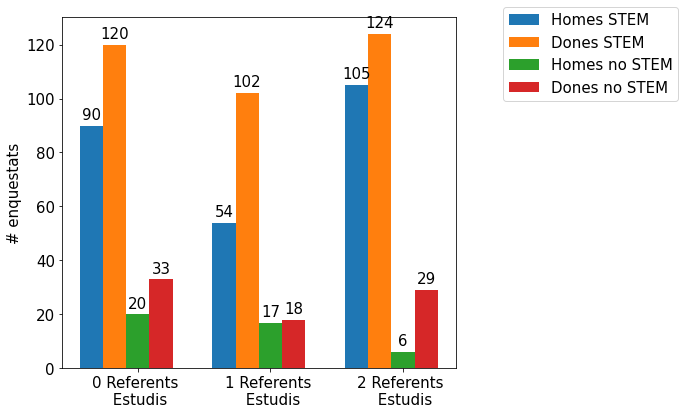

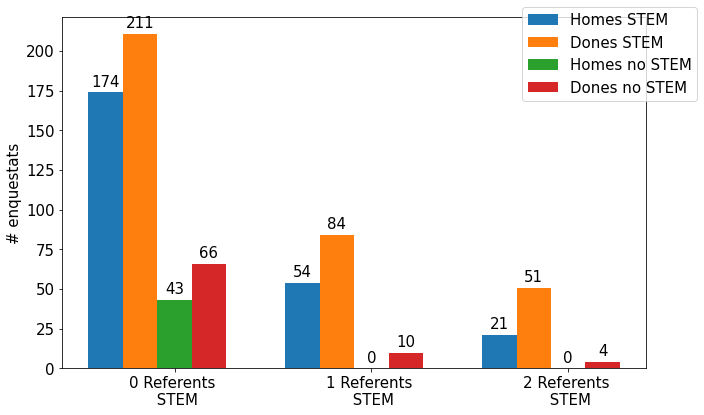

In [ ]:
def plot_bars_extended(data):


  aux=data[data.genere=='dona']
  aux2=data[data.genere=='home']




  [men_S_estudis , men_S_stem] = get_counts2(aux2[aux2.stem==1])
  [men_nS_estudis , men_nS_stem] = get_counts2(aux2[aux2.stem==0])

  [women_S_estudis , women_S_stem] = get_counts2(aux[aux.stem==1])
  [women_nS_estudis , women_nS_stem] = get_counts2(aux[aux.stem==0])

  
  x = np.arange(3)  # the label locations
  width = 0.35  # the width of the bars

  # Set position of bar on X axis
  #1 = np.arange(len(bars1))
  #r2 = [x + barWidth for x in r1]
  #r3 = [x + barWidth for x in r2]


  plt.rcParams['figure.figsize'] = [10,6]

  fig, ax = plt.subplots()

  rects1 = ax.bar(x - width, men_S_estudis , width/2, label='Homes STEM')
  rects2 = ax.bar(x - width/2, women_S_estudis , width/2, label='Dones STEM')

  rects3 = ax.bar(x , men_nS_estudis , width/2, label='Homes no STEM')
  rects4 = ax.bar(x + width/2, women_nS_estudis , width/2, label='Dones no STEM')

  
  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('# enquestats')
  #ax.set_title('Scores by group and gender')
  ax.set_xticks(x)
  ax.set_xticklabels(['0 Referents \n Estudis', '1 Referents \n Estudis', '2 Referents \n Estudis'])
  ax.legend()
  ax.legend(bbox_to_anchor=(1.1, 1.05))


  def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)
  autolabel(rects3)
  autolabel(rects4)

  fig.tight_layout()

  plt.show()



  plt.rcParams['figure.figsize'] = [10,6]

  fig, ax = plt.subplots()

  rects1 = ax.bar(x - width, men_S_stem , width/2, label='Homes STEM')
  rects2 = ax.bar(x - width/2, women_S_stem , width/2, label='Dones STEM')

  rects3 = ax.bar(x, men_nS_stem , width/2, label='Homes no STEM')
  rects4 = ax.bar(x + width/2, women_nS_stem , width/2, label='Dones no STEM')

  
  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('# enquestats')
  #ax.set_title('Scores by group and gender')
  ax.set_xticks(x)
  ax.set_xticklabels(['0 Referents \n STEM', '1 Referents \n STEM', '2 Referents \n STEM'])
  ax.legend()
  ax.legend(bbox_to_anchor=(1.1, 1.05))


  def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)
  autolabel(rects3)
  autolabel(rects4)

  fig.tight_layout()

  plt.show()

plot_bars_extended(df2_extended)

In [ ]:
def get_counts2(data2):
  count_estudis= [len(data2[data2.count_estudis==0]), len(data2[data2.count_estudis==1]), len(data2[data2.count_estudis==2])]
  count_stem= [len(data2[data2.count_stem==0]), len(data2[data2.count_stem==1]), len(data2[data2.count_stem==2])]
    
  return [count_estudis, count_stem]

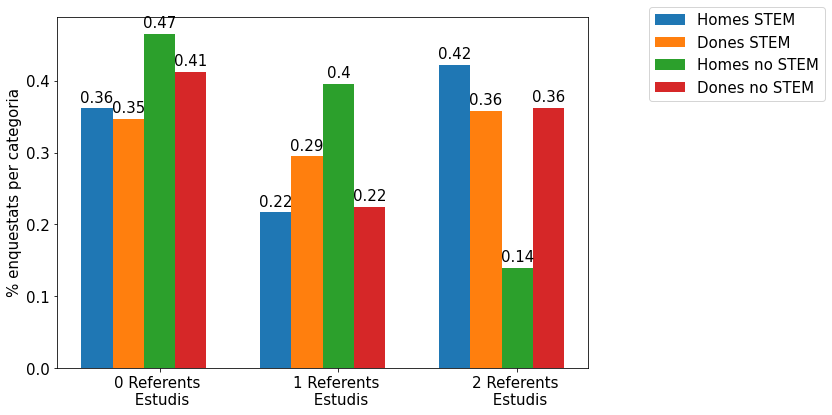

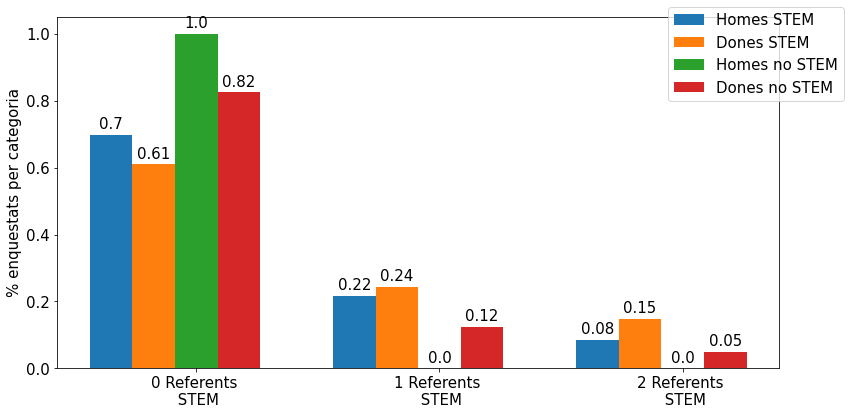

In [ ]:
def plot_bars_extended_relative(data):


  aux=data[data.genere=='dona']
  aux2=data[data.genere=='home']



  [men_S_estudis , men_S_stem] = get_counts2(aux2[aux2.stem==1])
  [men_nS_estudis , men_nS_stem] = get_counts2(aux2[aux2.stem==0])

  [women_S_estudis , women_S_stem] = get_counts2(aux[aux.stem==1])
  [women_nS_estudis , women_nS_stem] = get_counts2(aux[aux.stem==0])

  #men_S_rel= np.true_divide(men_count1, sum(men_count1)) 

  
  x = np.arange(3)  # the label locations
  width = 0.35  # the width of the bars

  # Set position of bar on X axis
  #1 = np.arange(len(bars1))
  #r2 = [x + barWidth for x in r1]
  #r3 = [x + barWidth for x in r2]


  plt.rcParams['figure.figsize'] = [12,6]

  fig, ax = plt.subplots()

  rects1 = ax.bar(x - width, np.true_divide(men_S_estudis, len(aux2[aux2.stem==1]))  , width/2, label='Homes STEM')
  rects2 = ax.bar(x - width/2,  np.true_divide(women_S_estudis, len(aux[aux.stem==1]))  , width/2, label='Dones STEM')

  rects3 = ax.bar(x , np.true_divide(men_nS_estudis, len(aux2[aux2.stem==0]))  , width/2, label='Homes no STEM')
  rects4 = ax.bar(x + width/2, np.true_divide(women_nS_estudis, len(aux[aux.stem==0])) , width/2, label='Dones no STEM')

  
  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('% enquestats per categoria')
  #ax.set_title('Scores by group and gender')
  ax.set_xticks(x)
  ax.set_xticklabels(['0 Referents \n Estudis', '1 Referents \n Estudis', '2 Referents \n Estudis'])
  ax.legend()
  ax.legend(bbox_to_anchor=(1.1, 1.05))


  def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)
  autolabel(rects3)
  autolabel(rects4)

  fig.tight_layout()

  plt.show()



  plt.rcParams['figure.figsize'] = [12,6]

  fig, ax = plt.subplots()

  rects1 = ax.bar(x - width, np.true_divide(men_S_stem, len(aux2[aux2.stem==1])) , width/2, label='Homes STEM')
  rects2 = ax.bar(x - width/2, np.true_divide(women_S_stem, len(aux[aux.stem==1])) , width/2, label='Dones STEM')

  rects3 = ax.bar(x, np.true_divide(men_nS_stem, len(aux2[aux2.stem==0])) , width/2, label='Homes no STEM')
  rects4 = ax.bar(x + width/2, np.true_divide(women_nS_stem, len(aux[aux.stem==0])) , width/2, label='Dones no STEM')

  
  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('% enquestats per categoria')
  #ax.set_title('Scores by group and gender')
  ax.set_xticks(x)
  ax.set_xticklabels(['0 Referents \n STEM', '1 Referents \n STEM', '2 Referents \n STEM'])
  ax.legend()
  ax.legend(bbox_to_anchor=(1.1, 1.05))


  def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)
  autolabel(rects3)
  autolabel(rects4)

  fig.tight_layout()

  plt.show()

plot_bars_extended_relative(df2_extended)

Les seguents grafiques representen el % respecte del genere masculi i femeni dels enquestats. 

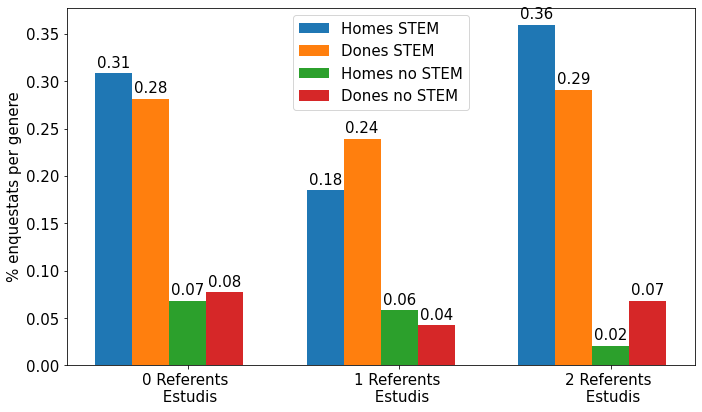

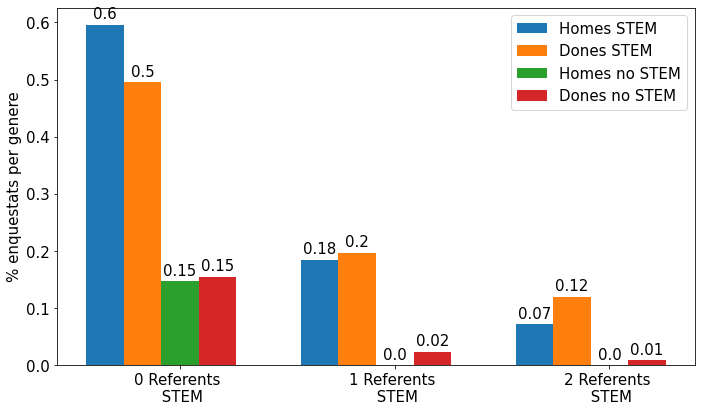

In [ ]:
def plot_bars_extended_relative_gender(data):


  aux=data[data.genere=='dona']
  aux2=data[data.genere=='home']


  def get_counts2(data2):
    count_estudis= [len(data2[data2.count_estudis==0]), len(data2[data2.count_estudis==1]), len(data2[data2.count_estudis==2])]
    count_stem= [len(data2[data2.count_stem==0]), len(data2[data2.count_stem==1]), len(data2[data2.count_stem==2])]
    
    return [count_estudis, count_stem]

  [men_S_estudis , men_S_stem] = get_counts2(aux2[aux2.stem==1])
  [men_nS_estudis , men_nS_stem] = get_counts2(aux2[aux2.stem==0])

  [women_S_estudis , women_S_stem] = get_counts2(aux[aux.stem==1])
  [women_nS_estudis , women_nS_stem] = get_counts2(aux[aux.stem==0])

  #men_S_rel= np.true_divide(men_count1, sum(men_count1)) 

  
  x = np.arange(3)  # the label locations
  width = 0.35  # the width of the bars

  # Set position of bar on X axis
  #1 = np.arange(len(bars1))
  #r2 = [x + barWidth for x in r1]
  #r3 = [x + barWidth for x in r2]


  plt.rcParams['figure.figsize'] = [10,6]

  fig, ax = plt.subplots()

  rects1 = ax.bar(x - width, np.true_divide(men_S_estudis, len(aux2))  , width/2, label='Homes STEM')
  rects2 = ax.bar(x - width/2,  np.true_divide(women_S_estudis, len(aux))  , width/2, label='Dones STEM')

  rects3 = ax.bar(x , np.true_divide(men_nS_estudis, len(aux2))  , width/2, label='Homes no STEM')
  rects4 = ax.bar(x + width/2, np.true_divide(women_nS_estudis, len(aux)) , width/2, label='Dones no STEM')

  
  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('% enquestats per genere')
  #ax.set_title('Scores by group and gender')
  ax.set_xticks(x)
  ax.set_xticklabels(['0 Referents \n Estudis', '1 Referents \n Estudis', '2 Referents \n Estudis'])
  ax.legend()

  def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)
  autolabel(rects3)
  autolabel(rects4)

  fig.tight_layout()

  plt.show()



  plt.rcParams['figure.figsize'] = [10,6]

  fig, ax = plt.subplots()

  rects1 = ax.bar(x - width, np.true_divide(men_S_stem, len(aux2)) , width/2, label='Homes STEM')
  rects2 = ax.bar(x - width/2, np.true_divide(women_S_stem, len(aux)) , width/2, label='Dones STEM')

  rects3 = ax.bar(x, np.true_divide(men_nS_stem, len(aux2)) , width/2, label='Homes no STEM')
  rects4 = ax.bar(x + width/2, np.true_divide(women_nS_stem, len(aux)) , width/2, label='Dones no STEM')

  
  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('% enquestats per genere')
  #ax.set_title('Scores by group and gender')
  ax.set_xticks(x)
  ax.set_xticklabels(['0 Referents \n STEM', '1 Referents \n STEM', '2 Referents \n STEM'])
  ax.legend()

  def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)
  autolabel(rects3)
  autolabel(rects4)

  fig.tight_layout()

  plt.show()


plot_bars_extended_relative_gender(df2_extended)

In [ ]:
df1_extended = df1_extended.replace(to_replace = ["dona"], value=1)
df1_extended = df1_extended.replace(to_replace = "home", value=0)

df1_extended

,genere,stem,referent1estudis,referent1stem,referent2estudis,referent2stem,count_estudis,count_stem
1,1,1,1,1,0,-1,1,1
2,1,1,0,-1,-1,-1,0,0
3,1,1,1,1,1,0,2,1
4,1,1,0,-1,0,-1,0,0
5,1,0,1,0,1,0,2,0
...,...,...,...,...,...,...,...,...
73,no-binari,1,0,0,0,0,0,0
93,no-binari,1,1,1,1,1,2,2
226,no-binari,1,1,1,1,1,2,2
355,no-binari,1,1,1,1,1,2,2


In [ ]:
cols=["count_estudis", "count_stem"] 

x=df1_extended[cols]
y=df1_extended["stem"]

import statsmodels.api as sm

logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.508085
         Iterations 7
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.115  
Dependent Variable: stem             AIC:              739.7073
Date:               2021-05-31 05:03 BIC:              748.8769
No. Observations:   724              Log-Likelihood:   -367.85 
Df Model:           1                LL-Null:          -329.93 
Df Residuals:       722              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
count_estudis   0.7227    0.0995  7.2627  0.0000  0.5277  0.9178
count_stem      1.1949    0.2567  4.6541  0.0000  0.6917  1.6981



Observem que totes les variables són estadísticament significatives a un nivell de significació del 5%. 

Tots els coeficients significatius són positius, això vol dir que el fet de pertànyer a una minoria pel que fa al teu gènere augmenta les probabilitats d'escollir estudis en el camp STEM. Aquí hem d'anar en compte perquè acceptar aquesta hipòtesi com a certa podria fer-nos equivocar, recordem que la majoria de les persones que han respost la nostra enquesta han estat dones!!

A més, veiem que com més referents STEM té una persona, augmenta la probabilitat de decantar-se cap a estudis STEM.

In [ ]:
margeff = result.get_margeff()
print(margeff.summary())

        Logit Marginal Effects       
Dep. Variable:                   stem
Method:                          dydx
At:                           overall
                   dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
count_estudis     0.1238      0.014      8.718      0.000       0.096       0.152
count_stem        0.2048      0.043      4.798      0.000       0.121       0.288


En particular, la taula superior ens mostra que per cada referent d'estudis superiors en disciplines STEM augmenta la probabilitat d'estudiar una carrera STEM en un 20,48%.

Recalcularem ara el model anterior separant entre homes i dones 

In [ ]:
data_dones_nobinari = df1_extended[df1_extended.genere==1]

cols=["count_estudis", "count_stem"] 

x=data_dones_nobinari[cols]
y=data_dones_nobinari["stem"]

logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.541435
         Iterations 6
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.121  
Dependent Variable: stem             AIC:              465.3027
Date:               2021-05-31 05:03 BIC:              473.4116
No. Observations:   426              Log-Likelihood:   -230.65 
Df Model:           1                LL-Null:          -205.76 
Df Residuals:       424              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
----------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
count_estudis   0.5379    0.1299  4.1396  0.0000  0.2832  0.7926
count_stem      1.0196    0.2732  3.7316  0.0002  0.4841  1.5552



Observem que per a les dones tant el nombre de referents amb estudis superiors com el nombre de referents amb estudis STEM tenen un impacte estadísticament significatiu sobre la probabilitat d'escollir estudis de branques STEM. Calculem els efectes marginals:

In [ ]:
margeff = result.get_margeff()
print(margeff.summary())

        Logit Marginal Effects       
Dep. Variable:                   stem
Method:                          dydx
At:                           overall
                   dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
count_estudis     0.0991      0.022      4.551      0.000       0.056       0.142
count_stem        0.1879      0.048      3.882      0.000       0.093       0.283


Per cada referent amb estudis superiors, la probabilitat que les dones i persones no binàries es decantin per carreres STEM augmenta un 9,91%. Per cada referent amb estudis STEM, la probabilitat augmenta un 18,79%.

In [ ]:
data_homes = df1_extended[df1_extended.genere==0]

cols=["count_estudis", "count_stem"] 

x=data_homes[cols]
y=data_homes["stem"]

logit_model=sm.Logit(y,x)
result=logit_model.fit(method='bfgs')
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.432874
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.036  
Dependent Variable: stem             AIC:              256.7984
Date:               2021-05-31 05:03 BIC:              264.1519
No. Observations:   292              Log-Likelihood:   -126.40 
Df Model:           1                LL-Null:          -122.03 
Df Residuals:       290              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
---------------------------------------------------------------
               Coef.  Std.Err.   z    P>|z|    [0.025   0.975] 
---------------------------------------------------------------
count_estudis  0.9398   0.1609 5.8400 0.0000    0.6244   1.2552
count_stem    11.0283  63.2727 0.1743 0.8616 -112.9838 135.0404



Observem que per als homes el nombre de referents amb estudis superiors de camps STEM no té un efecte estadísticament significatiu sobre la probabilitat de decantar-se per estudis STEM.

Apliquem un model de clustering. Importem les llibreries necessaries:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split

Busquem si el referent 1, amb estudis STEM, ha influenciat que l'individu es decanti per realitzar estudis STEM o no:

In [ ]:
df_x = df[:]

del df_x['El teu referent 1 (Pares, mares,tutors,...)ha finalitzat estudis superiors?']
del df_x['Marca temporal']

df_y = df[['El teu referent 1 (Pares, mares,tutors,...)ha finalitzat estudis superiors?']]

In [ ]:
Counter(df_y['El teu referent 1 (Pares, mares,tutors,...)ha finalitzat estudis superiors?'])

Counter({'': 48, 'No': 218, 'Sí': 315, 'Yes': 11})

In [ ]:
df_y.loc[df_y['El teu referent 1 (Pares, mares,tutors,...)ha finalitzat estudis superiors?'] == 'Yes',
        'El teu referent 1 (Pares, mares,tutors,...)ha finalitzat estudis superiors?'] = 'Sí'

df_y.loc[df_y['El teu referent 1 (Pares, mares,tutors,...)ha finalitzat estudis superiors?'] == 'Sí',
        'El teu referent 1 (Pares, mares,tutors,...)ha finalitzat estudis superiors?'] = 1

df_y.loc[df_y['El teu referent 1 (Pares, mares,tutors,...)ha finalitzat estudis superiors?'] == 'No',
        'El teu referent 1 (Pares, mares,tutors,...)ha finalitzat estudis superiors?'] = 0

Counter(df_y['El teu referent 1 (Pares, mares,tutors,...)ha finalitzat estudis superiors?'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher

Counter({'': 48, 0: 218, 1: 326})

In [ ]:
df_x = pd.get_dummies(df_x)
df_x.shape

(592, 105)

In [ ]:
trainX, testX, trainY, testY = train_test_split(df_x, df_y, test_size = 0.2)

In [ ]:
trainX = np.array(trainX)
trainY = np.array(trainY)

In [ ]:
sc=StandardScaler()

trainX_scaled = sc.fit_transform(trainX)

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(trainX_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Probabilitat amb k-means i dos clústers (binari):
correct = 0
for i in range(len(trainX_scaled)):
    predict_me = np.array(trainX_scaled[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == trainY[i]:
        correct += 1

print(correct/len(trainX_scaled))

0.5644820295983086


Aplicar un model de clustering a les nostres dades per tal de saber si el referent 1, amb estudis STEM, ha influenciat que l'individu es decanti per realitzar estudis STEM o no ens dóna una probabilitat d'encert del 39%.

Concluim doncs que el model no serà valid ja que el percentatge és massa baix.

In [ ]:
# Random guess:
259 * 100 / (259 + 163)

61.37440758293839

Amb les dades anteriors, un random guess tindria més probabilitat d'encert que el model de clustering aplicat (61% vs 39% respectivament).